In [2]:
import imblearn
from preprocessing import *
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


In [4]:
with open('X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)
with open('X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)
with open('y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)
with open('y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

In [3]:
X, y = preprocess_data('Modelar_UH2020.txt', process_cat = True)

El diccionario de categorías es {'OFFICE': 0, 'INDUSTRIAL': 1, 'RESIDENTIAL': 2, 'RETAIL': 3, 'PUBLIC': 4, 'AGRICULTURE': 5, 'OTHER': 6}


/Users/alejandrovaca/anaconda3/envs/sentinel_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [4]:
y = y.astype('int')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)

In [6]:
rf = RandomForestClassifier(n_estimators=100, n_jobs = -1, class_weight='balanced')

## Sin balancear

In [7]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [8]:
preds_nobalanced = rf.predict(X_test)

In [9]:
rf.score(X_test, y_test)

0.9126707352513804

In [10]:
f1_score(y_test, preds_nobalanced, average='macro')

0.5100683647612075

In [21]:
#f1_score(y_test, preds_nobalanced, average='micro')

## BALANCEADO

In [11]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [13]:
from collections import Counter

In [14]:
counter = Counter(y_train)

In [15]:
counter

Counter({2: 72138, 6: 1066, 3: 1675, 4: 2381, 0: 1462, 1: 3592, 5: 270})

In [16]:
dic_classes = {6:35000, 4:6000, 3: 6000, 2: 6000, 1: 6000, 5: 6000, 0: 2000}
orig_dic = {6: 72138, 4: 1066, 3: 1674, 2: 3592, 1: 2381, 5: 1463, 0: 270}

In [17]:
np.sum([v for v in dic_classes.values()])

67000

In [18]:
np.sum([v for v in orig_dic.values()])

82584

In [22]:
{k:v*20 for k, v in dict(counter).items()}

{2: 1442760, 6: 21320, 3: 33500, 4: 47620, 0: 29240, 1: 71840, 5: 5400}

In [32]:
#maxima = 
#[k for k, v in dict(counter).items()]
maximo = 0
for k, v in dict(counter).items():
    if v > maximo:
        maximo = v
        llave = k
    else:
        continue
print(llave)

2


In [58]:
over = SMOTE(sampling_strategy={k:int(v*15) for k, v in dict(counter).items() 
                                if k != llave})
under = RandomUnderSampler(sampling_strategy={k:int(v*0.95) for k, v in dict(counter).items()
                                             if k == llave})
steps = [('o', over), ('u', under)]

In [59]:
pipeline = Pipeline(steps)

In [60]:
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [61]:
rf.fit(X_resampled, y_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [62]:
rf.score(X_test, y_test)

0.9055991475346314

In [63]:
preds_balanced = rf.predict(X_test)

In [64]:
f1_score(y_test, preds_balanced, average='macro')

0.5596197689284331

In [55]:
from model_trainer import *

In [56]:
labels_dic = {'OFFICE': 0, 'INDUSTRIAL': 1, 'RESIDENTIAL': 2, 'RETAIL': 3, 'PUBLIC': 4, 'AGRICULTURE': 5, 'OTHER': 6}

Normalized confusion matrix


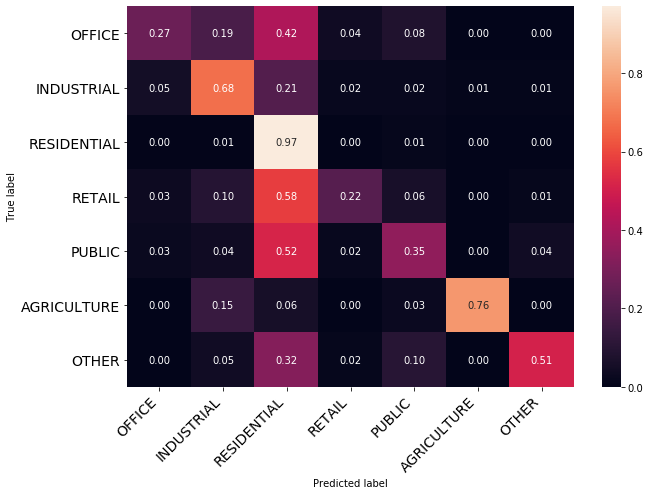

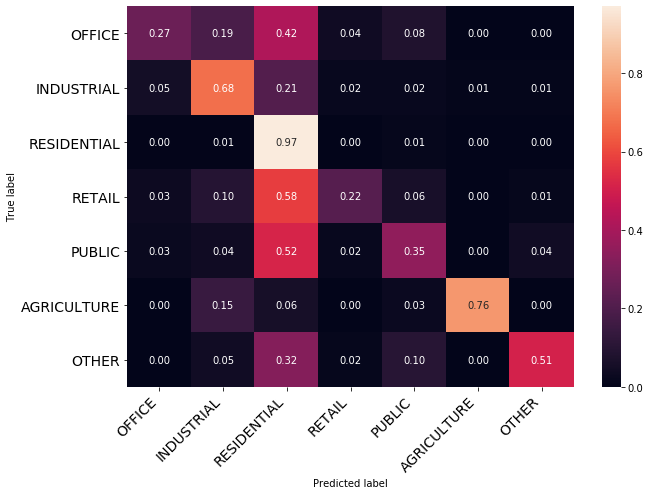

In [65]:
print_confusion_matrix(confusion_matrix(y_test, preds_balanced), class_names = {k:v for k, v in labels_dic.items()})

## OTHER METHODS

In [37]:
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks

In [36]:
from imblearn.combine import SMOTEENN, SMOTETomek

In [38]:
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')) #SMOTEENN(n_jobs=-1)

In [ ]:
X_resampled, y_resampled = resample.fit_resample(X_train, y_train)

In [ ]:
rf.fit(X_resampled, y_resampled)

In [ ]:
rf.score(X_test, y_test)

In [ ]:
preds_balanced = rf.predict(X_test)

In [ ]:
f1_score(y_test, preds_balanced, average='macro')